### [ 데이터 그룹화 및 시각화 ]
- 데이터 : auto_mpg.csv
- 실  습 : 그룹화, 멀티인데스, 시각화


[1] 모듈 로딩 및 데이터 준비 <hr>

In [59]:
## 모듈 로딩 
import pandas as pd
import sys
sys.path.append(r'C:\Users\kdt008\Desktop\KDT_10SL\EX_DATA_VS\COMM')

import datautil as util

In [60]:
## 데이터 준비
DATA_FILE = '../Data/auto_mpg.csv'

## csv ==> DataFrame으로 변환 저장
mpgDF = pd.read_csv(DATA_FILE)


In [61]:
## DataFrame 정보확인
util.summary(mpgDF, include='all')
util.print_info(mpgDF,'mpgDF')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN



[mpgDF]==================
obj.index   : RangeIndex(start=0, stop=398, step=1)
obj.columns : Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
obj.shape   : (398, 9)
obj.ndim    : 2D
obj.dtypes
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [62]:
## Series 정보 확인
sr = pd.Series([10,20,30])
util.summary(sr)

0    10
1    20
2    30
dtype: int64

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 156.0 bytes


count     3.0
mean     20.0
std      10.0
min      10.0
25%      15.0
50%      20.0
75%      25.0
max      30.0
dtype: float64

[2] 데이터 전처리<hr>

In [63]:
##[2-1] 결측치 체크 ==> isna() / isnull()
## 집계관련 메서드들 => axis 축 설정
## - 열/컬럼 단위 집계계산 axis = 0 또는 'index'
## - 행/로우 단위 집계계산 axis = 1 또는 'columns'
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [64]:
## [2-2] 컬럼별 고육값 검사 => unique() / nunique()
# for col in mpgDF.columns :
#     print(f'[{col}] ------------------- {mpgDF[col].nunique()}')
#     print(f'{mpgDF[col].unique()}')
#     print()
util.check_unique(mpgDF)

[mpg] ------------------- 129 개수/ float64
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[cylinders] ------------------- 5 개수/ int64
[8 4 6 3 5]

[displacement] ------------------- 82 개수/ float64
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   7

In [65]:
## [2-3] 이상문자 처리 및 자료형 변환
## horsepower의 '?'가 존재 개수 체크
mpgDF['horsepower'].value_counts()['?']

## 개수가 적음 ==> 제거
mpgDF['horsepower'] = mpgDF['horsepower'].replace('?', pd.NA)
mpgDF.dropna(inplace=True)


In [66]:
## [2-4] 자료형 변환
mpgDF['horsepower'] = mpgDF['horsepower'].astype('float')

[3] 컬럼들의 관계 체크<hr>
- 연비에 영향이 있는 요소/요인을 분석
- 타겟 : 연비 컬럼 <== 다른 컬럼의 영향으로 값이 결정. 종속 컬럼
- 피쳐 : 타겟컬럼에 영향을 끼치는 컬럼들. 독립변수 컬럼
- 컬럼들의 관계 정도 체크 => corr()

In [78]:
## mpg컬럼에 대한 다른 컬럼들과의 관계 수치값
mpgcorr = mpgDF.corr(numeric_only=True)['mpg']

mpgcorr = mpgcorr.sort_values().abs()

mpgcorr = mpgcorr[mpgcorr>=0.7]

print(mpgcorr)
print(mpgcorr.index)


weight          0.832244
displacement    0.805127
horsepower      0.778427
cylinders       0.777618
mpg             1.000000
Name: mpg, dtype: float64
Index(['weight', 'displacement', 'horsepower', 'cylinders', 'mpg'], dtype='object')


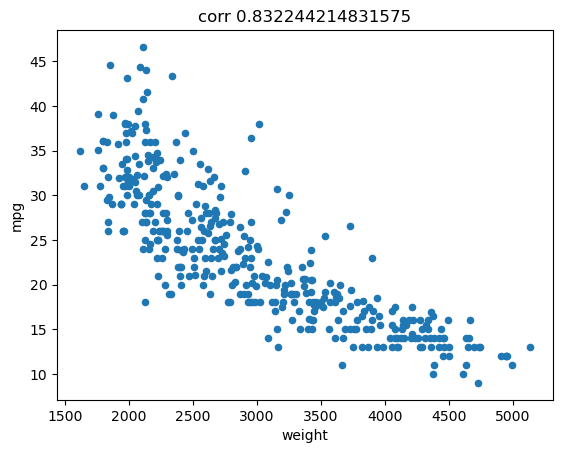

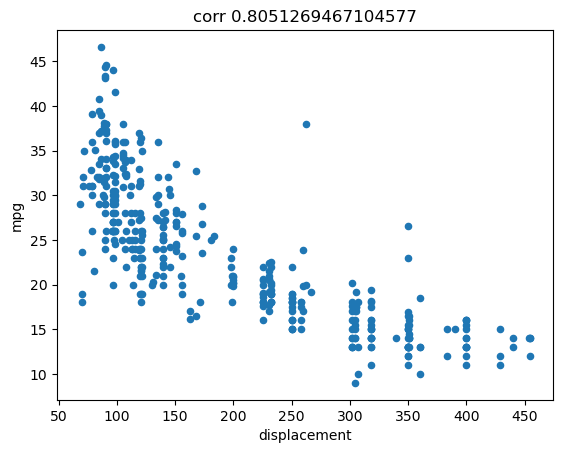

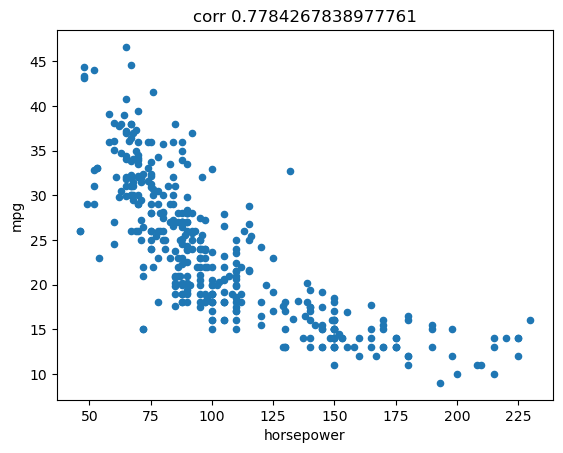

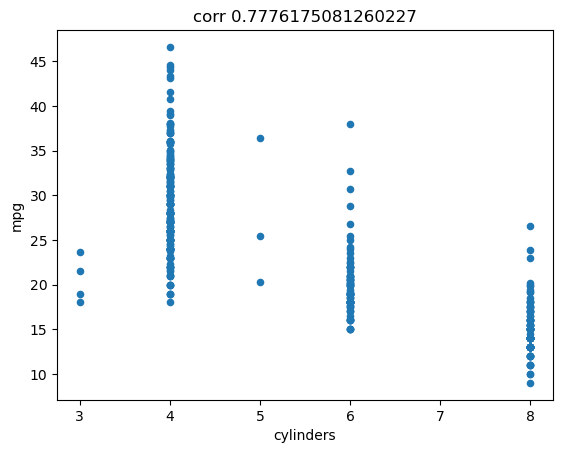

In [83]:
## mpg 컬럼과 관련성이 높은 컬럼들의 시각화
for col in mpgcorr.index[:-1] :
    mpgDF.plot(x=col, y='mpg', kind='scatter', title=f'corr {mpgcorr[col]}')


[4] 생산년도, 제조국에 따른 연비 비교 <hr>


In [91]:
## [4-1] 생산년도에 따른 데이터 그룹화
myearDF = mpgDF.groupby(by='model year')

## groups : 딕셔너리 형태로 그룹화된 정보 반환 => k : [그룹에 해당하는 행 인덱스]
for k in myearDF.groups :
    print(k, myearDF.get_group(k), sep='\n')

70
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0    3504          12.0   
1   15.0          8         350.0       165.0    3693          11.5   
2   18.0          8         318.0       150.0    3436          11.0   
3   16.0          8         304.0       150.0    3433          12.0   
4   17.0          8         302.0       140.0    3449          10.5   
5   15.0          8         429.0       198.0    4341          10.0   
6   14.0          8         454.0       220.0    4354           9.0   
7   14.0          8         440.0       215.0    4312           8.5   
8   14.0          8         455.0       225.0    4425          10.0   
9   15.0          8         390.0       190.0    3850           8.5   
10  15.0          8         383.0       170.0    3563          10.0   
11  14.0          8         340.0       160.0    3609           8.0   
12  15.0          8         400.0       150.0    3761           9.5   
13 

In [ ]:
## [4-2] 제조국에 따른 데이터 그룹화
myearDF = mpgDF.groupby(by='origin')

## groups : 딕셔너리 형태로 그룹화된 정보 반환 => k : [그룹에 해당하는 행 인덱스]
for k in myearDF.groups :
    ## get_group(k) : 해당 그룹 데이터프레임 반환
    print(k, myearDF.get_group(k), sep='\n')

1
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         151.0        90.0    2950          17.3   
393  27.0          4         140.0        86.0    2790          15.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1    